In [1]:
!pip install opencv-python

In [2]:
import cv2
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow


resnet152 = models.resnet152(pretrained=True)
modules = list(resnet152.children())[:-3]
resnet152 = nn.Sequential(*modules)

def get_output(image_path):
    input_image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        #transforms.Resize(256),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image).unsqueeze(0)

    with torch.no_grad():
        output = resnet152(input_tensor)

    return output

# Defining the path to the images
image_path1 = '/content/kentrosaurus.jpg'
image_path2 = '/content/abc.jpg'
image_path3 = '/content/abc.png'
image_path4 = '/content/Ab_C.jpg'
image_path5 = '/content/A_B_C.jpg'

# Getting the output tensors
dinosaur_tensor = get_output(image_path1)
many_dinosaur_tensor = get_output(image_path1) #здесь менять номер большой картинки

# Performing the convolution operation
output_tensor = nn.functional.conv2d(many_dinosaur_tensor, dinosaur_tensor, stride=1).squeeze()
print(output_tensor)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:04<00:00, 51.9MB/s]


tensor([[1383.3451, 1380.6808, 1420.3132,  ..., 1418.3296, 1419.6332,
         1447.0238],
        [1378.1453, 1372.4324, 1376.7499,  ..., 1369.1436, 1373.1720,
         1395.8724],
        [1441.7020, 1441.8346, 1451.6271,  ..., 1425.1187, 1434.2833,
         1464.6165],
        ...,
        [1482.5522, 1466.8713, 1476.3593,  ..., 1554.8906, 1541.5631,
         1554.1298],
        [1459.0078, 1449.3069, 1464.3539,  ..., 1523.4523, 1520.5323,
         1541.8241],
        [1466.2603, 1462.2893, 1472.9060,  ..., 1514.9220, 1516.8287,
         1548.0748]])


In [3]:
img1 = Image.open('/content/abc.jpg')
img2 = Image.open('/content/abc.png')
img3 = Image.open('/content/Ab_C.jpg')
img4 = Image.open('/content/A_B_C.jpg')

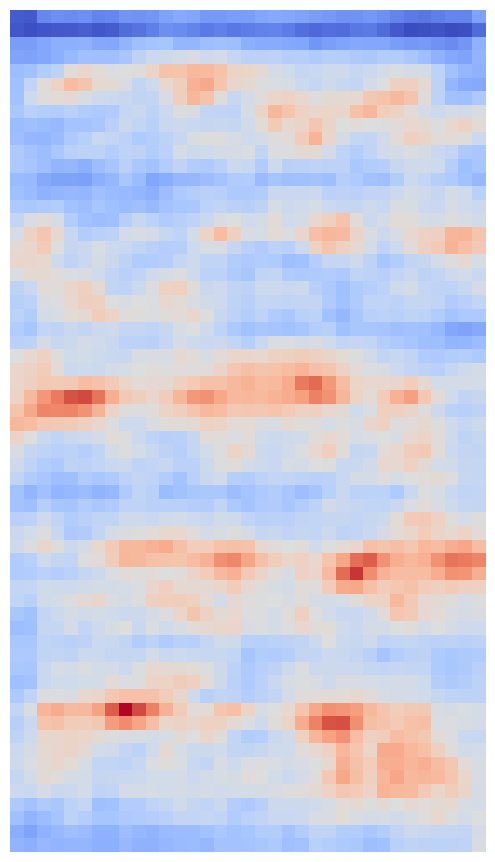

In [4]:
from PIL import Image
width, height = img1.size #здесь тоде менять номер большой картинки

fig, ax = plt.subplots(frameon=False)
fig.set_size_inches(width / 100, height / 100)

heatmap = sns.heatmap(output_tensor, cmap="coolwarm", alpha=1, cbar=False, linewidths=0, ax=ax)

plt.axis('off')
plt.imshow(img1, alpha=0.5) #не поверишь что тут надо делать

fig.savefig("heatmap_output.jpg", bbox_inches='tight', pad_inches=0)

img_heatmap = Image.open('heatmap_output.jpg')
img_heatmap_resized = img_heatmap.resize((width, height))
img_heatmap_resized.save('heatmap_output_resized.jpg')

plt.imshow(img_heatmap_resized)
plt.axis('off')
plt.show()

In [5]:
img_hm = Image.open('/content/heatmap_output_resized.jpg')
img_hm_bgr = cv2.cvtColor(np.array(img_hm), cv2.COLOR_RGB2BGR)

img_bgr = cv2.cvtColor(np.array(img2), cv2.COLOR_RGB2BGR)

alpha = 0.5
result = cv2.addWeighted(img_hm_bgr, 0.5 , img_bgr, 0.5, 0)

cv2.imwrite('window1.png', result) #здесь менять номер сохраняемой картинки, потом все по очереди выводятся

True

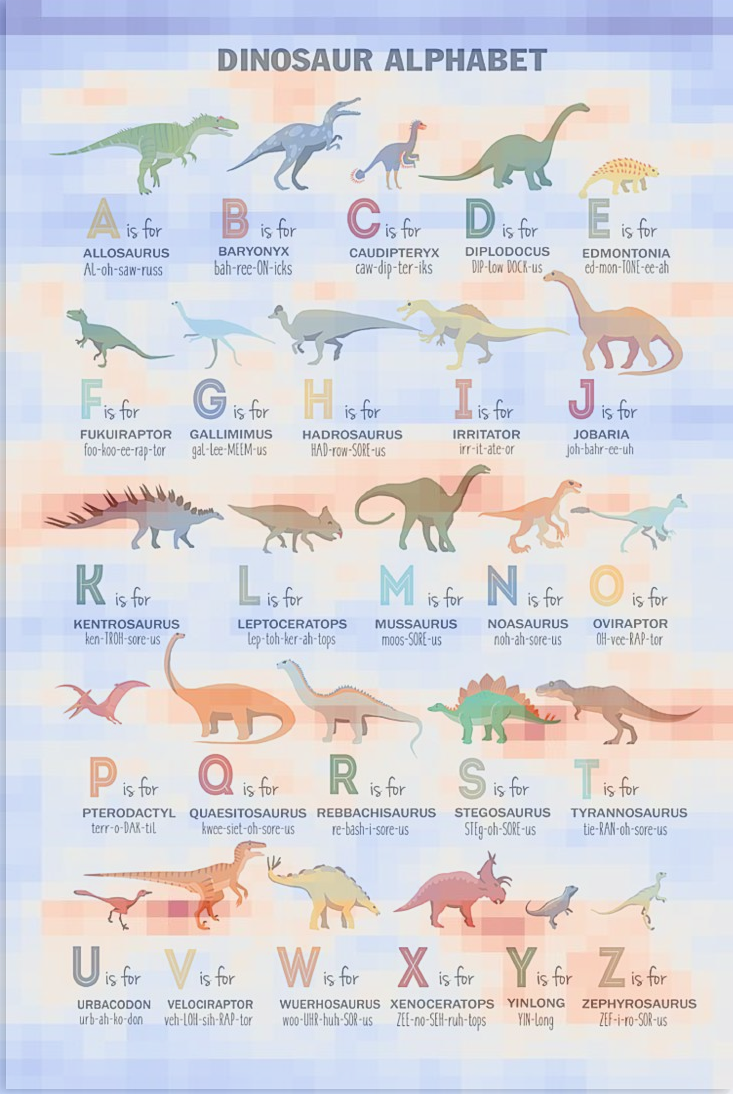

In [7]:
from IPython.display import Image
Image('/content/window2.png')

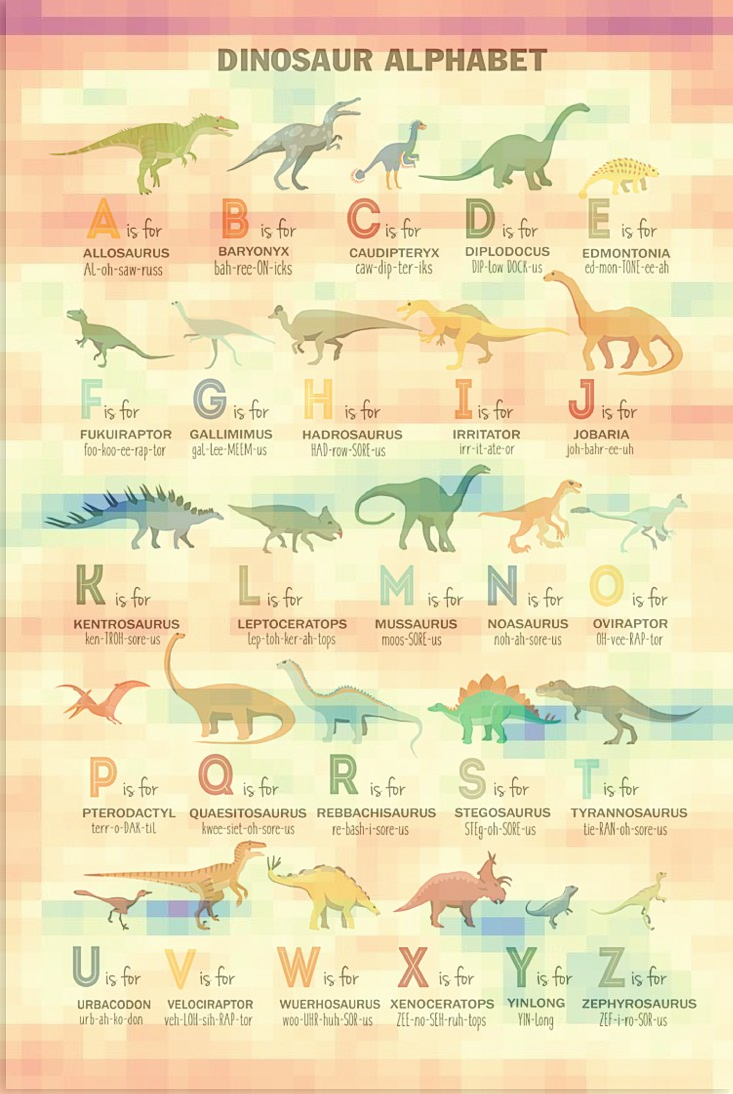

In [ ]:
from IPython.display import Image
Image('/content/window2.png')

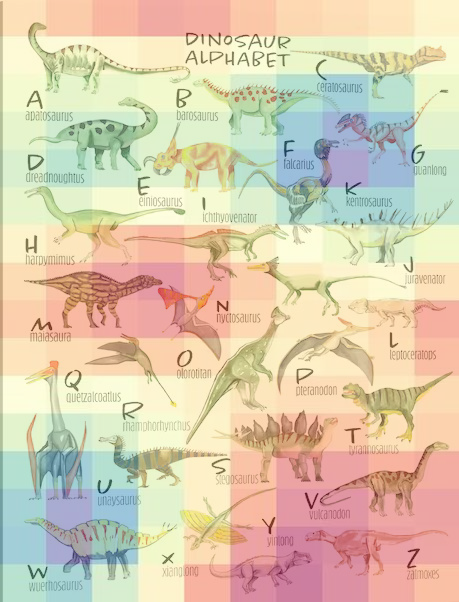

In [ ]:
from IPython.display import Image
Image('/content/window3.png')

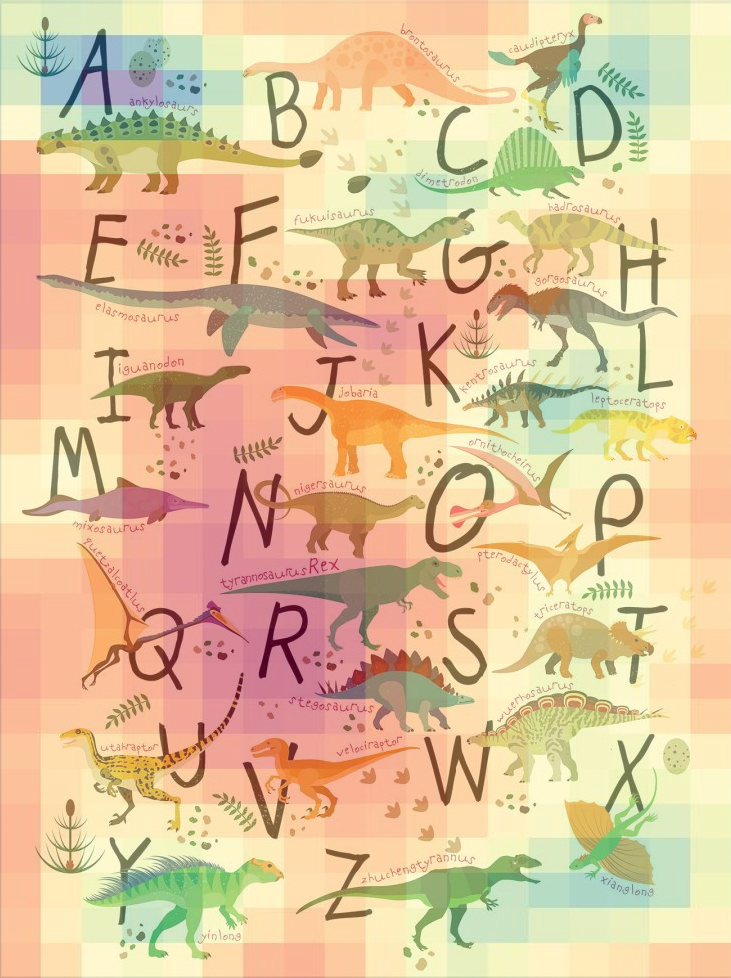

In [ ]:
from IPython.display import Image
Image('/content/window4.png')